In [2]:
import pandas as pd
import glob, os
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data = pd.read_csv('./src/data/data1.csv')
data.head()

,subject,date,day,time,logged_food,amount,unit,calorie,total_carb,sugar,protein,time_of_day,gender,datetime,hour,class,simplified_food
0,1.0,2020-02-13,1,18:00,Berry Smoothie,20.0,fluid ounce,456.0,85.0,83.0,16.0,Night,Female,2020-02-13 18:00:00,18,Beverage,smoothie
1,1.0,2020-02-14,2,07:10,Natrel Lactose Free 2 Percent,8.0,fluid ounce,120.0,9.0,8.0,12.0,Early Morning,Female,2020-02-14 07:10:00,7,Beverage,milk
2,1.0,2020-02-14,2,07:10,Standard Breakfast,0.75,cup,110.0,26.0,10.0,1.0,Early Morning,Female,2020-02-14 07:10:00,7,Meal,standard breakfast
3,1.0,2020-02-14,2,09:38,Breakfast Trail Mix,0.5,cup,280.0,30.0,22.0,4.0,Morning,Female,2020-02-14 09:38:00,9,Snack,standard breakfast
4,1.0,2020-02-14,2,12:38,Spinach Salad W/ Strawberries And Cheese,200.0,grams,286.0,14.0,8.5,7.6,Noon,Female,2020-02-14 12:38:00,12,Meal,salad


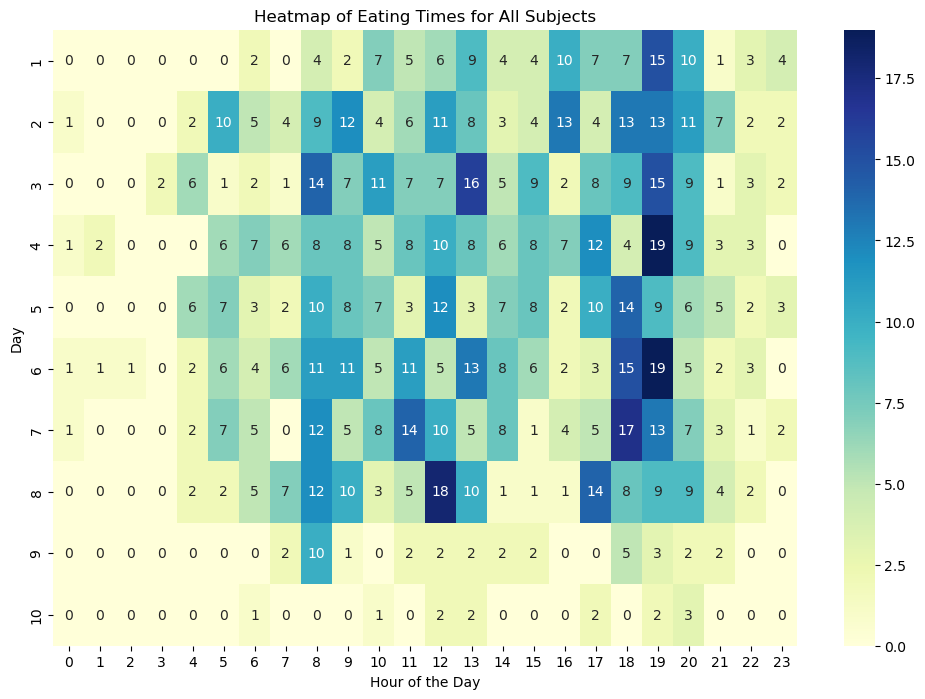

In [4]:
pivot_table = data.pivot_table(index='day', columns='hour', values='logged_food', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Eating Times for All Subjects')
plt.xlabel('Hour of the Day')
plt.ylabel('Day')
plt.show()

In [7]:
food_counts = data.groupby(['hour', 'class']).size().reset_index(name='count')
most_popular_food = food_counts.loc[food_counts.groupby('hour')['count'].idxmax()]

print(most_popular_food) # I think people are addicted to coffee and sugar lol

    hour     class  count
1      0      Meal      2
3      1  Beverage      2
5      2     Snack      1
6      3  Beverage      1
8      4  Beverage     13
10     5  Beverage     22
14     6      Meal     17
16     7  Beverage     16
19     8  Beverage     49
22     9  Beverage     30
25    10  Beverage     25
29    11      Meal     36
32    12      Meal     57
35    13      Meal     43
38    14      Meal     20
41    15      Meal     21
44    16      Meal     25
47    17      Meal     50
50    18      Meal     60
53    19      Meal     75
56    20      Meal     43
59    21      Meal     12
62    22      Meal     10
66    23     Snack      5


In [6]:
food_counts = data.groupby(['time_of_day', 'class']).size().reset_index(name='count')
most_popular_food = food_counts.loc[food_counts.groupby('time_of_day')['count'].idxmax()]

print(most_popular_food) # cheese and coffee interesting

      time_of_day     class  count
1       Afternoon      Meal    116
3   Early Morning  Beverage    102
6      Late Night  Beverage     23
10        Morning      Meal     85
13          Night      Meal    190
16           Noon      Meal    100
